# A DENGUE NO BRASIL
---

Apresentamos uma breve análise dos casos de dengue no Brasil, durante os anos
de 2014 até 2024. A principal fonte de informações foi encontrada no site governamental:

http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/denguebbr.def

Dele, retiramos os principais data frames utilizados nesta análise, manipulando-os no formato csv.

---

# Bibliotecas

In [ ]:
#biblioteca pandas para manipulação de dados a partir de Dataframes (tabelas)
import pandas as pd

#biblioteca matplotlib para criação de gráficos a partir dos dados
import matplotlib.pyplot as plt

# Upload dos arquivos

Aqui, será feito o upload dos arquivos que usaremos durante o código. Se já tiver os importado, clique em "cancelar" durante a execução.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving obitos_anos.csv to obitos_anos.csv


# Casos de dengue por estado

Aqui, vamos usar os dados do arquivo intitulado "uf_ano.csv" para construir um **gráfico de barras verticais**, onde o eixo x são os estados, e o eixo y é a quantidade de casos.

Note, também, que vamos utilizar o somatório de todos os casos entre os anos de 2014 a 2024, e, portanto, consideraremos que estes são os dados *acumulados*.

Primeiramente, vamos coletar os valores da tabela, que serão utilizados inclusive em outros gráficos:

In [ ]:
## LENDO VALORES

#função para converter csv em DataFrame (tabela)
df = pd.read_csv('uf_ano.csv', encoding='utf_8')

#na tabela, os dados nulos aparecem como '-'
#portanto, vamos usar a função replace para
#trocar '-' por 0
df = df.replace(to_replace= '-', value = 0)

#pegaremos a quantidade de colunas e de linhas
numero_colunas = df.shape[1]
numero_linhas = df.shape[0]

#lista dos estados, que servirá de eixo x
#no DataFrame, eles são as colunas, então
#usaremos o método "tolist()" para converter
#o cabeçalho da coluna para uma lista
#note que percorremos de 1 até numero_colunas -2
#para não pegarmos os casos em branco e totais
estados = df.columns.tolist()[ 1: (numero_colunas-2) ]

#pegaremos a lista de casos totais, que será o eixo y.
#o método "iloc[x]" pega a linha de índice x
#estamos pegando a última linha, pois contêm o total de casos em cada estado
total_casos_acumulado = df.iloc[numero_linhas-1].tolist()[1:(numero_colunas-2)]

#convertendo todos os elementos da lista para inteiro, para plotar o gráfico
total_casos_acumulado = [int(item) for item in total_casos_acumulado]

Agora, com estes valores, formaremos um gráfico de barras verticais simples:

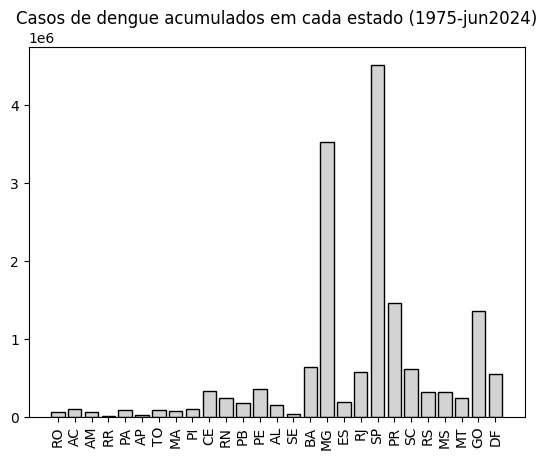

In [ ]:
## FORMANDO AS BARRAS E AJUSTANDO O GRÁFICO

# função que gera as barras (por isso .bar) do gráfico
# como já dito, os estados são o eixo x
# enquanto o total_casos_acumulado é o eixo y

# podemos também definir uma cor fixa para essas barras,
# e a cor de suas bordas
plt.bar(estados, total_casos_acumulado, color='lightgrey', edgecolor='black')

# vamos dar um título ao nosso gráfico, com a função .title
plt.title('Casos de dengue acumulados em cada estado (1975-jun2024)')

# e, para melhor visualização, vamos rotacionar os nomes dos estados
# (eixo x) em 90°
plt.xticks(estados, rotation=90)

# agora, basta mostrar o gráfico na tela com a função "show()":
plt.show()

E temos nosso gráfico feito!

Contudo, essa paleta de cinza não nos ajuda a mostrar a comparação entre as barras do gráfico. E se, ao invés disso, utilizássemos uma função que altera a cor conforme o tamanho da barra? Assim, poderiamos dar mais destaque ao gráfico, e enfatizar mais a diferença entre os estados.

Para isso, vamos encontrar o estado que mais teve casos (máximo) e calcular a cor como uma porcentagem da quantidade da barra pela quantidade máxima:

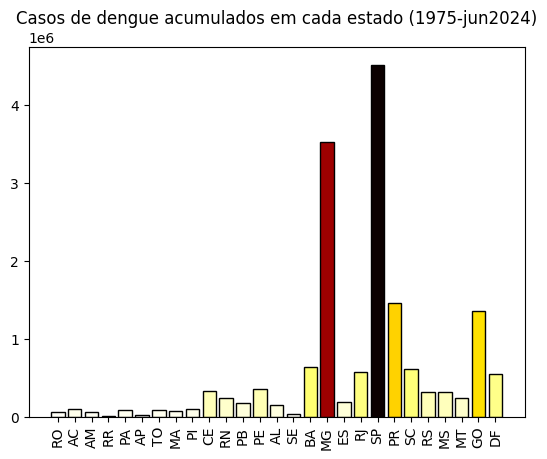

In [ ]:
## FORMANDO CORES

# queremos fazer barras maiores do gráfico terem cores mais quentes, usando
# "cm.hot()"

# pegando o maior valor da lista (eixo y), para servir como comparação:
max_casos = max(total_casos_acumulado)

# gerando uma lista com números de 0 a 1
# (quanto mais próximo de 1, mais quente a cor)
colors = plt.cm.hot([(1-(caso/max_casos)) for caso in total_casos_acumulado])

## FORMANDO AS BARRAS E AJUSTES FINAIS

#ao invés de uma cor fixa, passamos as cores obtidas anteriormente
plt.bar(estados, total_casos_acumulado, color=colors, edgecolor='black')

plt.title('Casos de dengue acumulados em cada estado (1975-jun2024)')
plt.xticks(estados, rotation=90)
plt.show()

# Casos de dengue por estado, considerando quantidade total da população

O gráfico acima ainda deixa uma informação crucial de lado: a população de cada estado. Afinal, é claro que estados mais populosos provavelmente terão mais casos de dengue.


Para eliminarmos essa problemática, faremos uma nova análise, desta vez dividindo a quantidade de casos totais, pela quantidade populacional. Assim, teremos uma estimativa que nos ajuda a ver o impacto da dengue, de fato, em cada estado.

Para a quantidade total da população, utilizaremos dados do censo de 2022, feito pelo IBGE, como segue:

In [ ]:
#DADOS DO CENSO DE 2022 DO IBGE
populacao_estados = {
    'RO': 1581196,
    'AC': 830018,
    'AM': 3941613,
    'RR': 636707,
    'PA': 8121025,
    'AP': 733759,
    'TO': 1511460,
    'MA': 6775805,
    'PI': 3271199,
    'CE': 8794957,
    'RN': 3302729,
    'PB': 3974687,
    'PE': 9058931,
    'AL': 3127683,
    'SE': 2209558,
    'BA': 14141626,
    'MG': 20538718,
    'ES': 3833712,
    'RJ': 16054524,
    'SP': 44411238,
    'PR': 11444380,
    'SC': 7610361,
    'RS': 10882965,
    'MS': 2757013,
    'MT': 3658649,
    'GO': 7514567,
    'DF': 2817381
}

In [ ]:
# Primeiramente, vamos criar uma lista ordenadas das populações, na mesma ordem
# em que os estados aparecem em nosso eixo:
populacoes_ordenadas = [populacao_estados[estado] for estado in estados]

Ainda utilizando os dados retirados do outro gráfico, vamos calcular os casos proporcionais:

In [ ]:
# Agora, nosso eixo y será a divisão da quantidade total de casos, pelo
# tamanho da população:
casos_uf_proporcional = [a / b for a, b in zip(total_casos_acumulado, populacoes_ordenadas)]

E então, vamos montar o gráfico novamente, com a mesma função de colorir barras com base em seu tamanho.

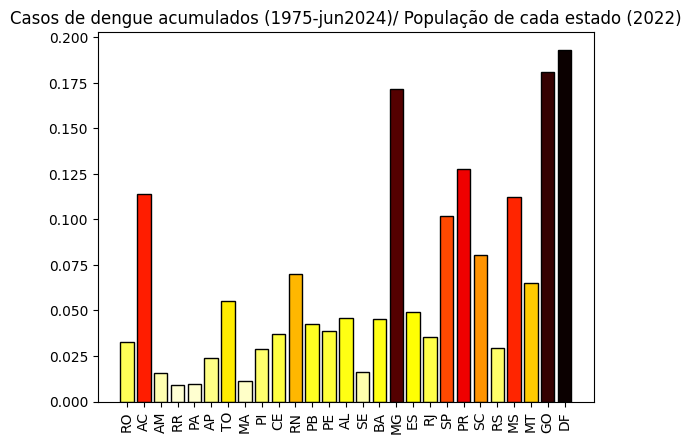

In [ ]:
# MONTANDO GRÁFICO COM NOVO EIXO Y:
max_casos = max(casos_uf_proporcional)
colors = plt.cm.hot([(1-(caso / max_casos)) for caso in casos_uf_proporcional])
plt.bar(estados, casos_uf_proporcional, color=colors, edgecolor='black')
plt.title('Casos de dengue acumulados (1975-jun2024)/ População de cada estado (2022)')
plt.xticks(estados, rotation=90)
plt.show()

# Casos de dengue por mês

Nosso objetivo no gráfico abaixo será fazer mais um gráfico de barras simples. Nosso eixo y continuará sendo a quantidade de casos, mas, desta vez, o eixo x serão os meses do ano.

Ademais, vamos usar três barras sobrepostas (que representarão os anos de 2014, 2023, e 2024), e um gráfico de linhas, que representará a média de casos em cada mês, para o período de 2014-2023.

In [ ]:
## LENDO DADOS

df = pd.read_csv('meses_ano.csv', encoding='utf_8', index_col=0)

numero_colunas = df.shape[1]
numero_linhas = df.shape[0]

#lista de meses
meses = df.columns.tolist()[1: (numero_colunas-1)]

In [ ]:
## SALVANDO OS DADOS DO EIXO Y PARA AS TRÊS BARRAS

# .loc["2014"] pega a linha com nome "2014"
casos_2014 = df.loc["2014"].tolist()[1:(numero_colunas-1)]
casos_2014 = [int(caso) for caso in casos_2014]

#realizando os mesmos passos para 2023 e 2024:
casos_2023 = df.loc["2023"].tolist()[1:(numero_colunas-1)]
casos_2023 = [int(caso) for caso in casos_2023]

casos_2024 = df.loc["2024"].tolist()[1:(numero_colunas-8)]
casos_2024 = [int(caso) for caso in casos_2024]

In [ ]:
## ENCONTRANDO MÉDIA

# nosso dataset vai até maio 2024, então
# precisamos de uma lista reduzida de meses para 2024
meses_2024 = df.columns.tolist()[1: (numero_colunas-8)]

# pegando a média de casos do intervalo 2014-2023
media = df.loc["2014":"2023"]
media = media.apply(pd.to_numeric, errors='coerce')
media = media.mean().tolist()[1:(numero_colunas-1)]

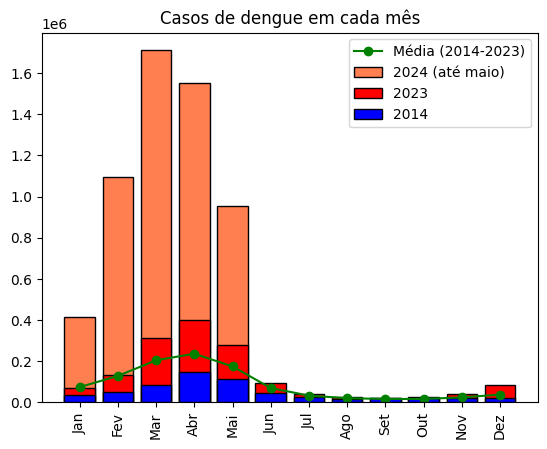

In [ ]:
## MONTANDO O GRÁFICO

# continuamos usando .bar para as barras,
# mas usaremos .plot para a linha

plt.bar(meses_2024, casos_2024, color='coral', label = '2024 (até maio)', edgecolor='black')
plt.bar(meses, casos_2023, color='red', label='2023', edgecolor='black')
plt.bar(meses, casos_2014, color='blue', label='2014', edgecolor='black')

#função que gera a linha do gráfico (.plot)
plt.plot(meses, media, color='green', marker='o', label = 'Média (2014-2023)')


plt.title('Casos de dengue em cada mês')
plt.xticks(meses, rotation=90)

#função que dá legenda ao gráfico
#(precisamos preencher label em plt.bar e plt.plot)
plt.legend()

#função que mostra o gráfico
plt.show()

# Comparando com notícia (raça, sexo, e idade)

Segue um trecho da notícia disponível em:

https://www.cnnbrasil.com.br/nacional/numero-de-casos-de-dengue-no-brasil-passa-de-6-milhoes-em-2024/

"As mulheres representam 54,9% dos casos prováveis, enquanto os homens representam 45,1%.

A faixa etária entre 20 e 49 anos concentra quase 50% dos casos, com mais de 2,9 milhões de registros. Dentro dessa faixa, os jovens entre 20 e 29 anos são os mais afetados, com mais de 1 milhão de casos. Em seguida, estão as pessoas entre 30 e 39 anos, com mais de 900 mil registros.

As pessoas brancas somam 49,5% dos casos, pardas 42,6%, pretas 6,3%, amarelas 1,3% e indígenas 0,3%."

Faremos a comparação entre os dados disponibilizados pelo site e os dados do datasus!

## Casos de dengue por raça

Nosso objetivo neste gráfico será analisar a distribuição da dengue pelas etnias, no ano de 2024, e analisar se as conclusões da notícia são verdadeiras. Para isso, como queremos representar parcelas da população, vamos utilizar um gráfico de pizza!

In [ ]:
## LEITURA DOS DADOS
df = pd.read_csv('dengue_raca_2024.csv', encoding='utf_8', index_col=0)

numero_colunas = df.shape[1]
numero_linhas = df.shape[0]

# lista de casos de 2024
casos = df.loc["2024"].tolist()[1:(numero_colunas-1)]

# pegando lista de raças
racas = df.columns.tolist()[1:numero_colunas-1]
casos = [int(caso) for caso in casos]

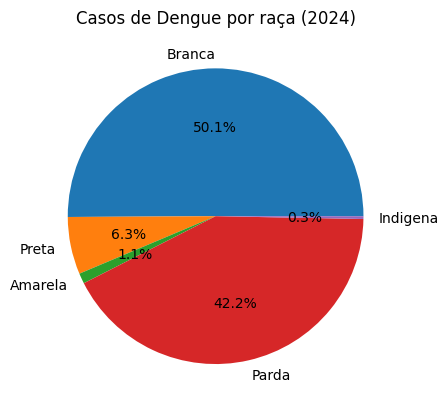

In [ ]:
# MONTANDO O GRÁFICO

# função que plota o gráfico em pizza (.pie)
plt.pie(casos, labels=racas, autopct='%1.1f%%')

# função que dá um título ao gráfico
plt.title('Casos de Dengue por raça (2024)')

# função que mostra o gráfico
plt.show()

## Casos de dengue por faixa etária



Nosso objetivo neste gráfico será analisar a distribuição da dengue pelas faixas etárias, no ano de 2024, e analisar se as conclusões da notícia são verdadeiras. Para isso, vamos utilizar um gráfico de barras horizontais!

In [ ]:
# LENDO DADOS

df = pd.read_csv('dengue_idade_2024.csv', encoding='utf_8', index_col=0)

numero_colunas = df.shape[1]
numero_linhas = df.shape[0]

#lista de faixa etária
idades = df.columns.tolist()[1:(numero_colunas-1)]
idades[0] = '0-1'

#lista de casos por faixa etária
casos = df.loc['2024'].tolist()[1:(numero_colunas-1)]

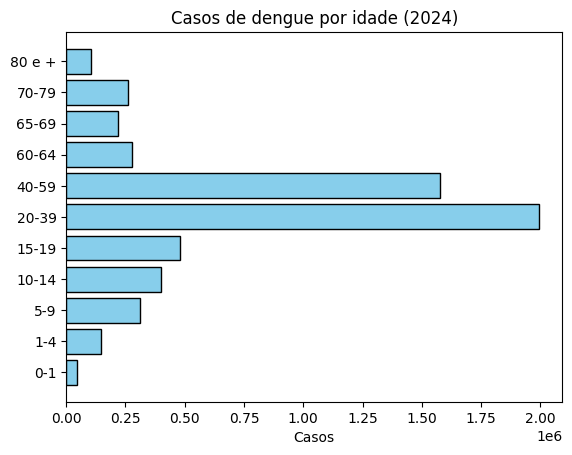

In [ ]:
## GERANDO O GRÁFICO

#função que gera as barras horizontais (.barh)
bars = plt.barh(idades, casos, color = 'skyblue', edgecolor='black')

#Nomeando o eixo x de 'Casos'
plt.xlabel('Casos')

#Dando um título ao gráfico
plt.title('Casos de dengue por idade (2024)')

#função que mostra o gráfico
plt.show()

Contudo, da mesma forma que no primeiro gráfico feito, vamos considerar também a quantidade percentual (isto é, a quantidade de casos, considerando o total da população que possui aquela faixa etária). Ademais, vamos usar uma função usando "def" ao invés de fazer a manipulação dos dados diretamente

In [ ]:
## DEFINIMOS A FUNÇÃO:

def idade_percentual(idades):
  df = pd.read_csv('dengue_idade_2024.csv', encoding='utf_8', index_col=0)

  numero_colunas = df.shape[1]
  numero_linhas = df.shape[0]

  #lista de faixa etária
  idades = df.columns.tolist()[1:(numero_colunas-1)]
  idades[0] = '0-1'

  #lista de casos por faixa etária
  casos = df.loc['2024'].tolist()[1:(numero_colunas-1)]

  casos_totais = 0
  for i in casos:
    casos_totais +=i
  casos_percentuais=[]

  for i in range(len(casos)):
      casos_percentuais.append(casos[i]/casos_totais)

  casos_percentuais[6]+=casos_percentuais[5] #Somando faixa etária dos 20 aos 50 anos
  casos_percentuais.remove(casos_percentuais[5])
  idades.remove(idades[5])
  idades[5]='20-59'
  #função que gera as barras horizontais (.barh)
  bars = plt.barh(idades, casos_percentuais, color = 'skyblue', edgecolor='black')

  #Nomeando o eixo x de 'Casos'
  plt.xlabel('Casos')

  #Dando um título ao gráfico
  plt.title('Casos de dengue por idade (2024) / Casos totais (2024)')

  #função que mostra o gráfico
  plt.show()

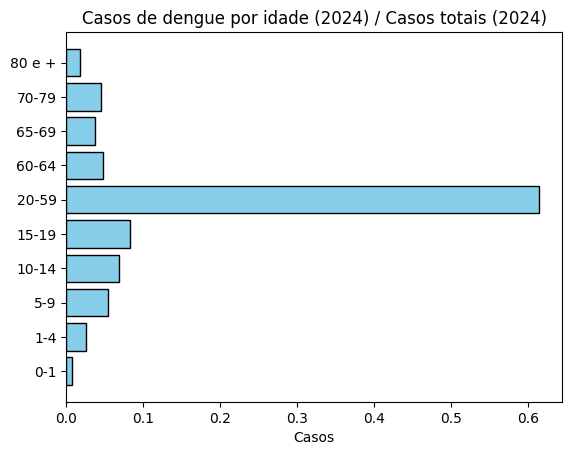

In [ ]:
## ENTÃO, A CHAMAMOS:
idade_percentual(idades)

## Casos de dengue por sexo

Da mesma forma que os outros gráficos, vamos analisar se as conclusões da notícia são verdadeiras:

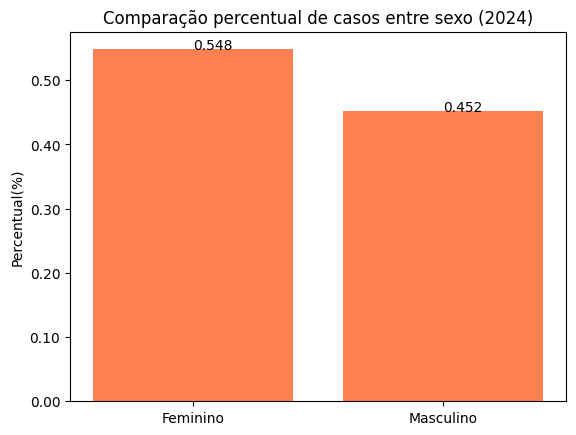

In [ ]:
from matplotlib.ticker import StrMethodFormatter

"Ano 1º Sintoma(s)";"Masculino";"Feminino";"Total"
"2023";2493;2729;5222
"2024";2737092;3321493;6058585
"Total";2739585;3324222;6063807

Sexos= ["Feminino","Masculino"]
casos=[3321493/6058585,2737092/6058585]

plt.title('Comparação percentual de casos entre sexo (2024)')

plt.bar(Sexos, casos, color='coral')
plt.text(Sexos[0],casos[0],round(casos[0],3))
plt.text(Sexos[1],casos[1],round(casos[1],3))
plt.ylabel("Percentual(%)")

#função que dá legenda ao gráfico
#(precisamos preencher label em plt.bar e plt.plot)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

#função que mostra o gráfico
plt.show()

# Casos de dengue por região

Agora, faremos um gráfico de linhas para representar os casos de dengue nas cinco regiões brasileiras, nos anos de 2024, 2023, e 2014:

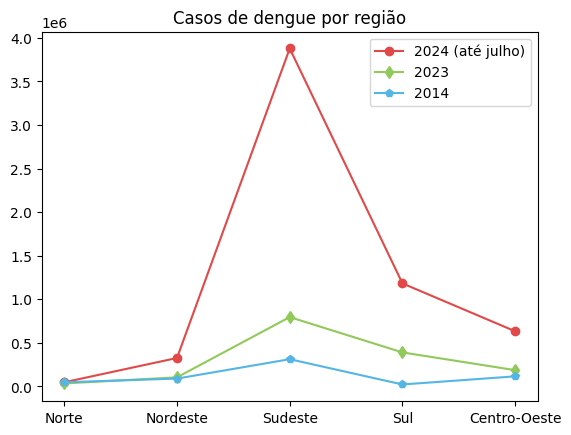

In [ ]:
## LEITURA DOS DADOS
df = pd.read_csv('regiao.csv', encoding='utf_8', index_col=0)

number_columns = df.shape[1]
number_rows = df.shape[0]

regioes = df.columns.tolist()[0:number_columns]

casos_2014 = df.iloc[0].tolist()[0: number_columns]
casos_2023 = df.iloc[1].tolist()[0: number_columns]
casos_2024 = df.iloc[2].tolist()[0: number_columns]

## FORMANDO GRÁFICO

plt.title('Casos de dengue por região')

plt.plot(regioes, casos_2024, color='#e14948',  marker='o', label = '2024 (até julho)')
plt.plot(regioes, casos_2023, color='#91c95a',  marker='d', label='2023')
plt.plot(regioes, casos_2014, color='#55b5e5',  marker='p', label='2014')

plt.legend()
plt.show()

# Casos de óbitos por dengue em cada estado (bruto e proporcional)

Vamos analisar, por um gráfico de barras que muda de cor dependendo do tamanho do gráfico, a quantidade de óbitos acumulados (no período de 2014 - 2024) por cada estado, tanto de forma bruta quanto proporcional.

Vale citar que trataremos os casos de óbitos em investigação também como óbitos por dengue

### Dados brutos:

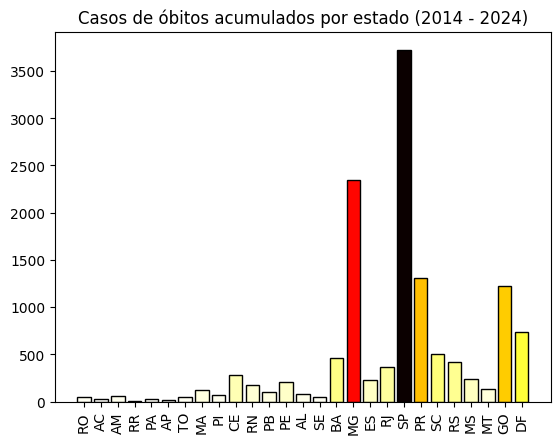

In [ ]:
# LEITURA DOS DADOS
df = pd.read_csv('obitos_estado.csv', encoding='utf_8', index_col=0)
df = df.replace(to_replace= '-', value = 0)

number_columns = df.shape[1]
number_rows = df.shape[0]

estados = df.columns.tolist()[0:number_columns-2]


# instanciando um vetor inicialmente nulo
casos_obito = [0]*(number_columns-2)

for i in range(number_columns - 2):
  casos_obito[i] += pd.to_numeric(df.iloc[1][i], errors='coerce')
  casos_obito[i] += pd.to_numeric(df.iloc[3][i], errors='coerce')

## MONTANDO O GRÁFICO

max_casos = max(casos_obito)
colors = plt.cm.hot([(1- (caso / max_casos)) for caso in casos_obito])
plt.bar(estados, casos_obito, color=colors, edgecolor='black')
plt.title("Casos de óbitos acumulados por estado (2014 - 2024)")
plt.xticks(estados, rotation=90)
plt.show()

### Dados proporcionais:

In [ ]:
# Usaremos a mesma definição de população por estados do censo de 2022 do IBGE
# definida mais acima no colab.

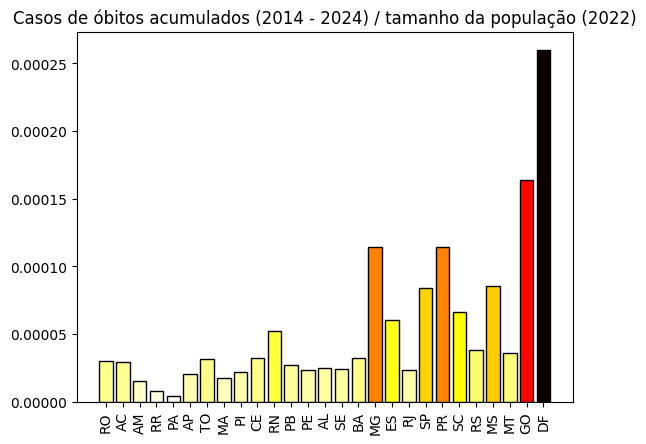

In [ ]:
# MONTANDO O GRÁFICO
populacoes_ordenadas = [populacao_estados[estado] for estado in estados]
casos_estados_proporcional = [a / b for a, b in zip(casos_obito, populacoes_ordenadas)]
max_casos = max(casos_estados_proporcional)
colors = plt.cm.hot([(1-(caso / max_casos)) for caso in casos_estados_proporcional])
plt.bar(estados, casos_estados_proporcional, color=colors, edgecolor='black')
plt.title('Casos de óbitos acumulados (2014 - 2024) / tamanho da população (2022)')
plt.xticks(estados, rotation=90)
plt.show()

# Casos de óbito por dengue em cada região (bruto e proporcional)

Vamos analisar, por um gráfico de barras que muda de cor dependendo do tamanho do gráfico, a quantidade de óbitos acumulados (no período de 2014 - 2024) por cada região, tanto de forma bruta quanto proporcional.

Vale citar que trataremos os casos de óbitos em investigação também como óbitos por dengue

### Dados brutos

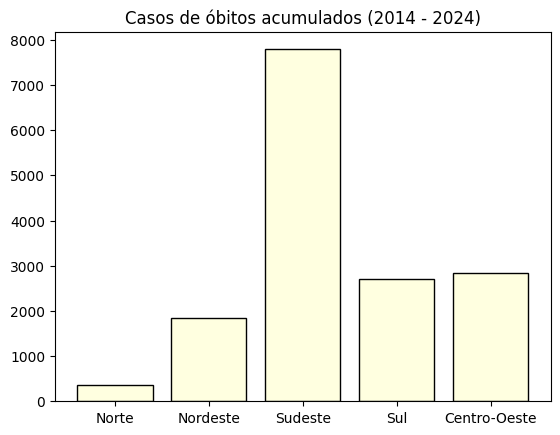

In [ ]:
## LEITURA DOS DADOS
df = pd.read_csv('obitos_regiao.csv', encoding='utf_8', index_col=0)

number_columns = df.shape[1]
number_rows = df.shape[0]

regioes = df.columns.tolist()[0:number_columns-1]

# instanciando um vetor com todos elementos nulos
casos_obito = [0]*(number_columns-1)

for i in range(number_columns - 1):
  casos_obito[i] += df.iloc[1][i] + df.iloc[2][i] + df.iloc[3][i]

plt.bar(regioes, casos_obito, color='lightyellow', edgecolor='black')
plt.title("Casos de óbitos acumulados (2014 - 2024)")
plt.show()

### Dados proporcionais

In [ ]:
# Usaremos o somatório dos estados do censo, de acordo com
# suas regiões
populacao_regioes = {
    'Norte': 17355778,
    'Nordeste': 54657175,
    'Sudeste': 84838192,
    'Centro-Oeste': 16747610,
    'Sul': 29937706
}

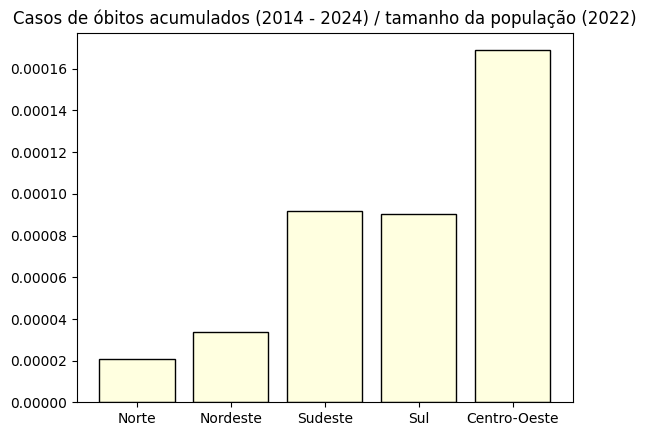

In [ ]:
populacoes_ordenadas = [populacao_regioes[regiao] for regiao in regioes]
casos_regioes_proporcional = [a / b for a, b in zip(casos_obito, populacoes_ordenadas)]
plt.bar(regioes, casos_regioes_proporcional, color='lightyellow', edgecolor='black')
plt.title('Casos de óbitos acumulados (2014 - 2024) / tamanho da população (2022)')
plt.show()

# Comparação, municípios fora/dentro da extrema pobreza
Vamos comparar os dados da dengue e comparar com municípios que estão em extrema pobreza e municípios que não estão, segundo dados do DATA SUS de 2024 e do Senso do IBGE 2022

Primeiro, importamos as tabelas necessárias

##Matemátiquês


### Contas
Esse texto vai ser a explicação do que faremos no código, é uma matemática básica, veremos a porcentagem média de caso de dengue dos múnicipios em cada um dos casos, ou seja, faremos para todo municipio:

Porcentagem da população com dengue = $P_i=\frac{Casos}{PopulaçãoTotal}$

E a média será feita por:

$Média = \frac{∑Pi}{MunicipiosEmSituação}$

Dito isso, agora vamos ao código.

##Código

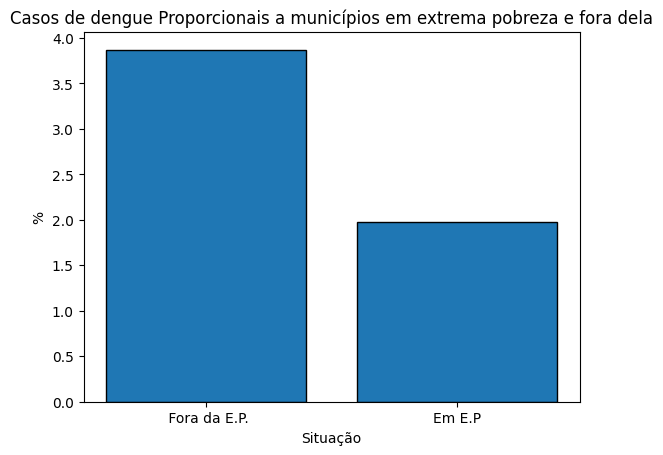

3.87 1.98


In [ ]:
aceitosn=0
aceitos=0
def combinar_listas(lista1, lista2, lista3):
    resultados = []
    global aceitos
    global aceitosn
    # Criar um dicionário para lista2 e lista3 com a origem, convertendo os nomes para minúsculas
    dict_combined = {tupla[0].lower(): (tupla[-1], 0) for tupla in lista2}
    dict_combined.update({tupla[0].lower(): (tupla[-1], 1) for tupla in lista3})

    # Iterar sobre a lista1 e buscar nos dicionários, convertendo os nomes para minúsculas
    for tupla1 in lista1:
        nome1, inteiro1 = tupla1
        nome1_lower = nome1.lower()
        if nome1_lower in dict_combined:
            ultimo, origem = dict_combined[nome1_lower]
            resultados.append((nome1, inteiro1, ultimo, origem))
            if(dict_combined[nome1_lower][-1] == 1):
                aceitosn+=1
            else:
                aceitos+=1

    return resultados

def Media(lista):
    non = 0
    yes = 0

    for i in lista:
        if(i[-1]) == 1:
            non += i[2]/i[1]*100
        else:
            yes += i[2]/i[1]*100
    return non,yes

def grafico():
    df = pd.read_csv("População_Municipio.csv")
    df2 = pd.read_csv("Dengue_extrema_pobreza.csv",encoding="utf_8")
    df3 = pd.read_csv("Dengue_nao_extrema_pobreza.csv",encoding="utf_8")

    # Converter o DataFrame em uma lista de tuplas
    muni = list(map(tuple, df.values.tolist()))
    ext = list(map(tuple,df2.values.tolist()))
    n_ext=list(map(tuple,df3.values.tolist()))

    lista = combinar_listas(muni,ext,n_ext) #0 se estiver em extrema e 1 se não estiver
    Fora,Extrema = Media(lista)
    percentuais = [round(Fora/aceitosn,2), round(Extrema/aceitos,2)]
    nomes = [" Fora da E.P.","Em E.P"]
    plt.bar(nomes,percentuais, edgecolor='black') # (x,y) axis

    #função que dá um título ao gráfico
    plt.title('Casos de dengue Proporcionais a municípios em extrema pobreza e fora dela')
    plt.xlabel("Situação")
    plt.ylabel("%")

    #rotacionar os nomes dos estados em 90 graus

    #função que mostra o gráfico
    plt.show()
    print(round(Fora/aceitosn,2), round(Extrema/aceitos,2))

grafico()